In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import entropy
import math as math
import seaborn as sns
from matplotlib.colors import LogNorm
%pylab inline

!pip install sociophysicsdatahandler

Populating the interactive namespace from numpy and matplotlib


In [2]:
from sociophysicsDataHandler import SociophysicsDataHandler
!cat auth.txt

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
dh = SociophysicsDataHandler()
pd.set_option('float_format', '{:f}'.format)

In [4]:
# dates
list_days = ['20210401','20210402','20210403','20210404','20210405','20210406','20210407','20210408','20210409','20210410']

In [5]:
# concat multiple dates worth of data in one large dataframe
df_list = []
for i in list_days:
  try:
    file_path = 'ehv/platform2.1' + '/' + i + '/'
    flst = dh.list_files(file_path)

    dh.fetch_prorail_data_from_path(file_path + '/' + flst.name[6])
    df_list.append(dh.df)
  except:
    pass
large_dataframe = pd.concat(df_list)

targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210401/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210401//EHV_Platform2.1_2021040106_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210402/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210402//EHV_Platform2.1_2021040206_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210403/
Files listed. Accessible as <this-object>.filelist
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210403//EHV_Platform2.1_2021040306_trajectorie.parquet
data fetched. Accessible as <this-object>.df
targeting path /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20210404/
Files listed

In [6]:
# sort by tracked object and use central difference formula to compute velocity
large_dataframe = large_dataframe.sort_values(by=['tracked_object'])
large_dataframe['x_velocity']=np.gradient(large_dataframe['x_pos'])
large_dataframe['y_velocity']=np.gradient(large_dataframe['y_pos'])
large_dataframe['velocity'] = np.sqrt(large_dataframe['x_velocity']**2 + large_dataframe['y_velocity']**2)

In [11]:
large_dataframe.head()

,date_time_utc,tracked_object,x_pos,y_pos,x_velocity,y_velocity,velocity
0,1617256800000.000000,45261,-1373.000000,16271.000000,251.000000,-25.000000,252.241943
12791,1617257131600.000000,45261,-1122.000000,16246.000000,118.500000,-13.500000,119.266510
12795,1617257131700.000000,45261,-1136.000000,16244.000000,-8.000000,-8.000000,11.313708
12799,1617257131800.000000,45261,-1138.000000,16230.000000,2.500000,-14.000000,14.221462
12803,1617257131900.000000,45261,-1131.000000,16216.000000,0.500000,0.500000,0.707107


In [7]:
# choose waiters
waiters = large_dataframe[(large_dataframe['velocity']<10) & (large_dataframe['y_pos']<70000)]

In [8]:
# create heatmap to see where people like to wait
H, xedges, yedges = histogram2d(waiters.y_pos,waiters.x_pos,bins=(150,30))
H = H.T

In [9]:
# remove unwanted datapoints such as the high values at the stairs,
# h is now the probability landscape
H[16:21,127:138]=10
h = H[7:-1]

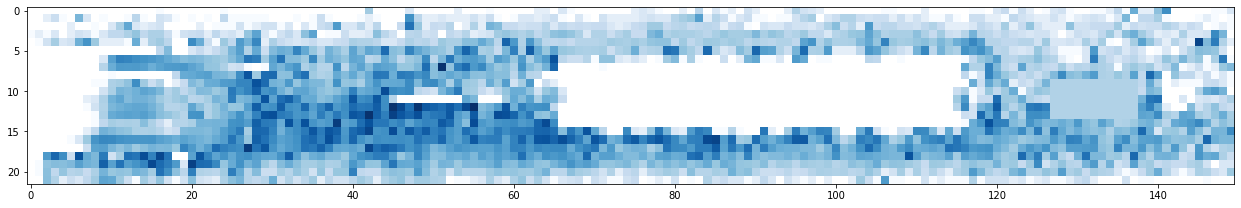

In [10]:
fig, ax = subplots(figsize=(22, 3))
ax.imshow(h,cmap = 'Blues',norm = LogNorm())
tight_layout()

idea: to make this time dependent, use the heat equation to average the probability landscape when the train arrives.